<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampDataEngineering/blob/master/WritingFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCCleaningData/")
os.getcwd()

'/content/gdrive/My Drive/DCCleaningData'

# Best Practices

### Writing Docstrings

In [0]:
def function(args): # google style, numpydocs
  '''
  What function does.

  What the arguments are, if any.

  What gets returned, if anything.

  What errors get raised, if any.

  Extra notes or examples of usage.
  '''

In [0]:
#Google Style
'''
Description in imperative language.

Args:
  arg1(dtype) description of arg1. Can go on 
    multiple lines.
  arg2(dtype,optional) note optional default argument in place.  

Returns:
  bool
  list
  don't indent extra lines

Raises:
  TypeOfError: describe

Notes:
  Extra notes here.

'''

"\nDescription in imperative language.\n\nArgs:\n  arg1(dtype) description of arg1. Can go on \n    multiple lines.\n  arg2(dtype,optional) note optional default argument in place.  \n\nReturns:\n  bool\n  list\n  don't indent extra lines\n\nRaises:\n  TypeOfError: describe\n\nNotes:\n  Extra notes here.\n\n"

In [0]:
# Numpy Style
'''
Description of what function does.

Parameters
----------

arg_1 : Expected type of arg_1.
  Description of arg_1.
arg_2 : int, optional.
  Write optional if there is a default value.
  Default=42.

Returns
-------
The type of return value.
  Describe.
  Use Yields instead of Returns if describing a generator.
'''  


In [0]:
# To return a functions docstring.

print(function_name.__doc__)

In [0]:
# Cleaner way
import inspect

print(inspect.getdoc(function_name)) # returns cleaner appearing docstring

In [0]:
# Example
def count_letter(content, letter):
  '''
  Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns: 
      int

  Raises:
    ValueError: If `letter` is not a one-character string.    
  """
       
  '''
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [0]:
docstring = count_letter.__doc__

In [0]:
# Even works when a function is passed into the function
def outer_function(function):

var = inspect.getdoc(function)

### DRY and Do One Thing

In [0]:
# DRY Don't Repeat Yourself
# avoid copying code-use functions to avoid it
# eg can write afunction to load and plot data .... except... it's better to follow the principals of...



In [0]:
# Do One Thing
# split function into one that loads and one that plots

In [0]:
import pandas as pd
def load_csv(path): # docstring has to be indented
  '''
  Load a csv with pandas.

  Args:
    path: path to csv.

  Returns:
    First three rows of the csv.  

  '''


  csv = pd.read_csv(path)
  data = csv.head(3)
  return data

data = load_csv('tips.csv')
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [0]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

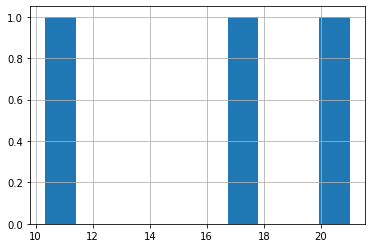

In [0]:
import matplotlib.pyplot as plt


def plot_hist(column):
  '''
  Plot a histogram of a column of numerical data.

  Args:
    column (pandas Series): Series of float data.

  Returns:
    histogram

  '''

  return column.hist()

hist = plot_hist(data['total_bill'])  
hist

In [0]:
def percent_tip(df,tip_col, total_col):
  '''
  Calculate the percent tip.

  Args:
    df (pandas DataFrame): Dataframe to be analyzed.
    tip_col (pandas Series): Series that contains tip data.
    total_col (pandas Series): Series that contains total bill data.

  Returns:
    A column's worth of new data.  
  '''
  percent_tip = round(tip_col/total_col,2)
  return percent_tip

data['percent_tip'] = percent_tip(data,data['tip'],data['total_bill'])
data.head(3)


,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17


In [0]:
#mean
li = [1,2,3,4,5]
sum(li)/len(li)

3.0

In [0]:
#median
def find_median(values):
  midpoint = int(len(values)/2)
  if len(li) %2 == 0:
    median = (values[midpoint-1]+values[midpoint])/2
  else:
    median = values[midpoint]
  return median

find_median(li)

3

### Pass by Assignment

In [0]:
# lists are mutable, integers are not,becareful of using mutable objets as functionparameters, use None instead
  # Update the function to create a default DataFrame


  # Way to create a default data frame so you don't have to pass one into the function
def better_add_column(values, df=None):
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df

# Context Managers

### Using Context Managers

In [0]:
# with

#with contextmanager(args) as variable:
  #action
  #action

with open('alice.txt') as file:
  text = file.read()


# theoretical context manager timer()   
with  timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image) 

### Writing Context Managers

In [0]:
'''Steps'''
# Define function
# add function actions
# use yield
# tear down code,e.g. file.close()
# add context decorator in the line obove the function definition in line with it @contextlib.contextmanager

'Steps'

In [0]:
import contextlib
@contextlib.contextmanager
def blah():
  print('Hello')
  yield 42
  print('Goodbye')

with blah() as foo:
  print('foo is {}'.format(foo))  

Hello
foo is 42
Goodbye


In [0]:
from urllib.request import urlretrieve
import pandas as pd

@contextlib.contextmanager
def read_csv_from_web(url):
  urlretrieve(url,'winequality-red1.csv')
  data= pd.read_csv('winequality-red1.csv',sep=';')
  yield data

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

with read_csv_from_web(url):
  data = data
  print(data.head(3))


   total_bill   tip     sex smoker  day    time  size  percent_tip
0       16.99  1.01  Female     No  Sun  Dinner     2         0.06
1       10.34  1.66    Male     No  Sun  Dinner     3         0.16
2       21.01  3.50    Male     No  Sun  Dinner     3         0.17


In [0]:
# Example
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

### Advanced Topics

In [0]:
# Example function for copying a large file - using a context manager in a function

def copy_large_file(source_file, destination_file):
  with open(source_file,'r') as src:
    with open(destination_file, 'w'):
      for line in destination_file:
        destination_file.write(line)
        destination_file.close()
    source_file.close()    

In [0]:
# Handling errors, use finally after yield so system will allow final action to execute even if there is an error


In [0]:
# Example
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open "NVDA.txt" for writing as f_out
  with open('NVDA.txt', 'w') as f_out:
    for _ in range(10):
      value = nvda.price()
      print('Logging ${:.2f} for NVDA'.format(value))
      f_out.write('{:.2f}\n'.format(value))

In [0]:
# Example

def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)

# Decorators

### Functions are objects

In [0]:
# Assigning functions to variabls
x = int
y = len
z = open

# parentheses are only used when function is called
int(5)

In [0]:
def has_docstring(func):
  return func.__doc__ is not None

In [4]:
has_docstring(int)

True

In [5]:
has_docstring(open)

True

In [7]:
def foo():
  l = [1,2,3]
  
  def bar(y):
    print(y)

  for x in l:
    bar(x)  
foo()    

1
2
3


In [0]:
def foo(x,y):
  def in_range(v):
    return v>4 and v<10
  if in_range(x) and in_range(y):
    return(x*6)  

In [0]:
# Call has_docstring() on the load_and_plot_data() function
ok = has_docstring(load_and_plot_data)

if not ok:
  print("load_and_plot_data() doesn't have a docstring!")
else:
  print("load_and_plot_data() looks ok")

In [0]:

def create_math_function(func_name):
  if func_name == 'add':
    def add(a, b):
      return a + b
    return add
  elif func_name == 'subtract':
    # Define the subtract() function
    def subtract(a,b):
        return a - b
    return subtract    
  else:
    print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

### Scope

In [0]:
# local, nonlocal, global, builtin
# use global inside function to change value of global variable to local value
# ''  nonlocal '  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 

In [9]:
x = 50

def one():
  x = 10

def two():
  global x
  x = 30

def three():
  x = 100
  print(x)

for func in [one, two, three]:
  func()
  print(x)  # 50, 30, 100, 30

50
30
100
30


### Closures

In [0]:
# Tuple that is not in scope but but is necessary for a function to run

In [10]:
def foo():
  x = 5
  def bar():
    print(x)
  return bar
func = foo()

func()

5


In [0]:
# Closure: Python's way of attaching nonlocal variables to returned functions so that they can operate when it is called outside of it's paren'ts scope
# Decorators rely on: functions as object, nested functions, nonlocal scope, closures

In [13]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

# Show that my_func()'s closure is not None
print(my_func.__closure__ is not None)

True


In [12]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
  my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])

True
True
True


### Decorators

In [0]:
# Decorator: Somethign to put arounda function that changes its behavior (modify inputs, outputs, change actions)

In [0]:
# Write Decorator for functions designed in notebooks

In [0]:
# Without decorator syntax
# print_args() is a decorator function
def my_function(a, b, c):
  print(a + b + c)

# Decorate my_function() with the print_args() decorator
my_function = print_args(my_function)

my_function(1, 2, 3)

In [0]:
# Decorate my_function() with the print_args() decorator
@print_args
def my_function(a, b, c):
  print(a + b + c)

my_function(1, 2, 3)

In [0]:

def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

# More on Decorators

### Real World Examples

In [0]:
# Use decorators when applying code to multiple functions, like in testing the timing of functions

def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args,**kwargs):
    # Call the function being decorated
    result = func(*args,**kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result

In [0]:

def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func(*args, **kwargs)
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

### Decorators and Metadata

In [0]:
# python will not return metadata (name, docstring) on a decorated function unless...

from functools import wraps

def decorator_func(func):

  @wraps(func) # this decorator on the wrapper function corrects metadata errors
  def wrapper(*args,**kwargs):

  return wrapper  

In [0]:

@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50))) #adding __wrapped__ to a decorated func allows it to run without decoration
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

### Decorators that take arguments

In [0]:
# Write a function that returns a decorator (with a wrapper inside) instead of a wrapper

def run_n_times(n):
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)  
    return  wrapper
  return decorator    

In [23]:
@run_n_times(3) # number in parentheses references a decorator function
def multiply_2(a,b):
  print(a * b * 2)

  
multiply_2(2,5)

20
20
20


In [24]:
run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)

104
104
104
104
104


In [25]:

print = run_n_times(20)(print)

print('What is happening?!?!')

What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!


### Timeout: real world example

In [0]:
# Version that results in error
import signal
from functools import wraps
import time
def timeout_in_5s(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    signal.alarm(5)
    try:
      return func(*args,**kwargs)
    finally:
      signal.alarm(0)
  return wrapper


In [0]:
# Session crashes but it's supposed to be a timeout error
@timeout_in_5s
def foo():
  time.sleep(6)
  print('foo!')
foo()  

In [0]:
import signal
from functools import wraps
import time
def timeout_in_5s(n_seconds):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      signal.alarm(n_seconds)
      try:
        return func(*args,**kwargs)
      finally:
        signal.alarm(0)
    return wrapper
  return decorator  

In [4]:
@timeout_in_5s(20)
def foo():
  time.sleep(10)
  print('foo!')
foo() 

foo!


In [0]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

In [0]:
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(*args,**kwargs):
    result = func(*args,**kwargs)
    assert(type(result) == dict)
    return result
  return wrapper
  
@returns_dict
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')
  

In [0]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*args,**kwargs):
      result = func(*args,**kwargs)
      assert(type(result) == return_type)
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')